In [207]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [208]:
(x_train_data, y_train_data), (x_test_data, y_test_data) = tf.keras.datasets.fashion_mnist.load_data();
assert x_train_data.shape == (60000, 28, 28)
assert x_test_data.shape == (10000, 28, 28)
assert y_train_data.shape == (60000,)
assert y_test_data.shape == (10000,)

In [209]:
bin_mask_train = (y_train_data == 3) | (y_train_data == 5)
bin_mask_test = (y_test_data == 3) | (y_test_data == 5)

print(y_train_data)
print(y_test_data)

print(bin_mask_train)
print(bin_mask_test)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]
[False False False ...  True False  True]
[False False False ... False False  True]


In [210]:
x_train = x_train_data[bin_mask_train]
y_train = y_train_data[bin_mask_train]
x_test = x_test_data[bin_mask_test]
y_test = y_test_data[bin_mask_test]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12000, 28, 28)
(12000,)
(2000, 28, 28)
(2000,)


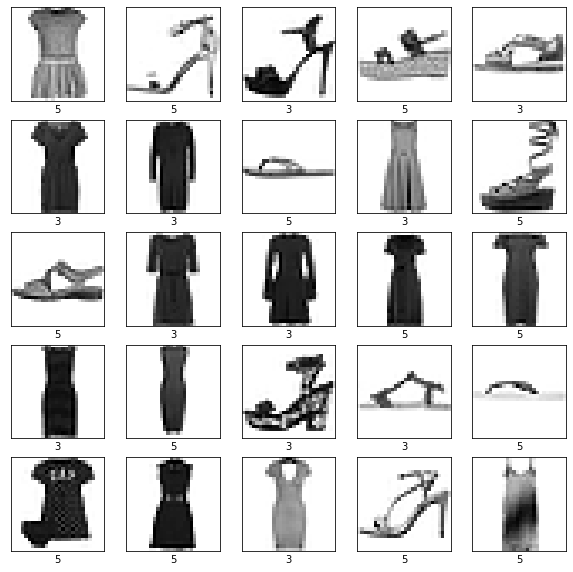

In [211]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()

In [212]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Normalization())
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
normalization_21 (Normalizat (None, 784)               1569      
Total params: 1,569
Trainable params: 0
Non-trainable params: 1,569
_________________________________________________________________


In [213]:
print(x_train[1:20])
x = x_train[1:20]
y = model(x)
y

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   7   0   0]
  ...
  [  0   0   0 ...   0   9   0]
  [  0   0   0 ...   0   3   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   6   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

<tf.Tensor: shape=(19, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [214]:
print(y_train)
print(y_test)
y_train[y_train == 5] = 1
y_train[y_train == 3] = 0
y_test[y_test == 5] = 1
y_test[y_test == 3] = 0
print(y_train)
print(y_test)

[3 5 5 ... 5 3 5]
[5 5 3 ... 5 5 5]
[0 1 1 ... 1 0 1]
[1 1 0 ... 1 1 1]


In [215]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
normalization_21 (Normalizat (None, 784)               1569      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 785       
Total params: 2,354
Trainable params: 785
Non-trainable params: 1,569
_________________________________________________________________


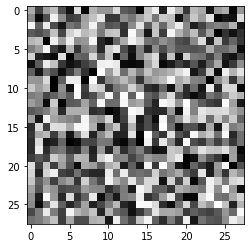

In [216]:
def plot_weights(layer):
    dense_layer = layer
    dense_reshaped = tf.reshape(dense_layer.weights[0],(28,28))

    plt.imshow(dense_reshaped, cmap=plt.cm.binary)
    plt.show()

plot_weights(model.layers[2])


In [217]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [218]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=16
)

Epoch 1/10
750/750 [==============================] - 1s 641us/step - loss: 6.5750 - binary_accuracy: 0.9952

{'loss': [6.574975490570068, 1.1619842052459717, 0.36649829149246216, 0.768621027469635, 0.5643763542175293, 0.03504704311490059, 0.010249635204672813, 0.017121804878115654, 0.0, 0.0], 'binary_accuracy': [0.9952499866485596, 0.9989166855812073, 0.9994166493415833, 0.9987499713897705, 0.9992499947547913, 0.999833345413208, 0.999833345413208, 0.999916672706604, 1.0, 1.0]}


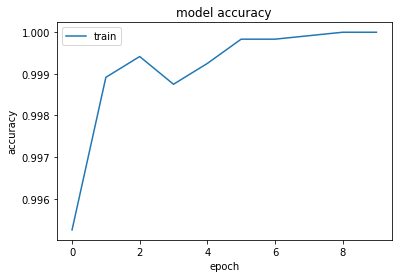

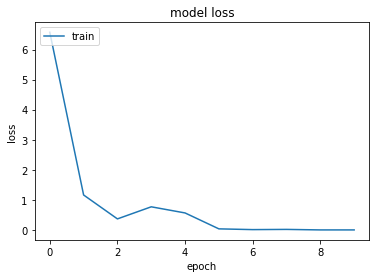

In [219]:
print(history.history)
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [220]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size = 16)
print('\nTest accuracy:', test_acc)

125/125 [==============================] - 0s 548us/step - loss: 1.0749 - binary_accuracy: 0.9990

Test accuracy: 0.9990000128746033


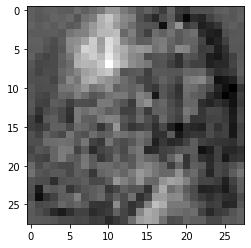

In [221]:
plot_weights(model.layers[2])

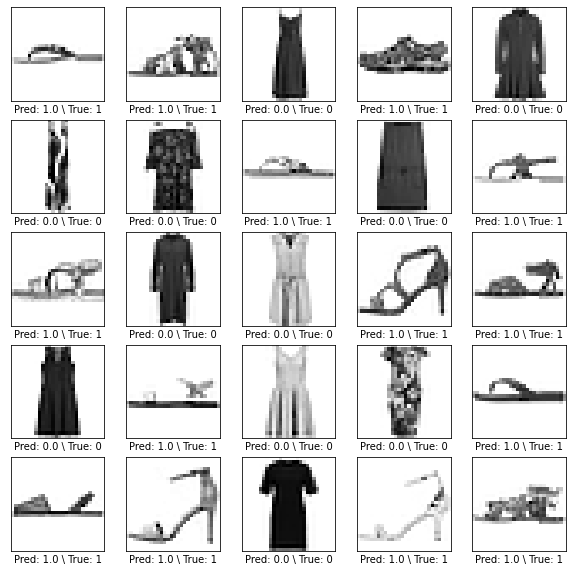

In [222]:
y_pred = model.predict(x_test)
y_true = y_test

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("Pred: " + str(y_pred[i][0]) + " \ True: " + str(y_test[i]))
plt.show()
